# 🎬 Netflix Movie Recommendation System
This project builds a **content-based recommendation system** using the **Netflix Movies and TV Shows** dataset from Kaggle.
Dataset: [Netflix Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/netflix-shows)

We'll use the show's description, cast, director, and genres to recommend similar titles.

In [3]:
# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
# --- Load Dataset ---
# Ensure you've downloaded the dataset from Kaggle and placed 'netflix_titles.csv' in your working directory.
df = pd.read_csv('netflix_titles.csv')
print('Dataset shape:', df.shape)
df.head()

Dataset shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# --- Basic Info and Cleaning ---
df.info()
('\nMissing Values:\n', df.isnull().sum())

# Fill missing text fields with empty strings
for col in ['director', 'cast', 'country', 'rating', 'listed_in', 'description']:
    df[col] = df[col].fillna('')

# Create a combined 'tags' feature that merges important text fields
df['tags'] = df['director'] + ' ' + df['cast'] + ' ' + df['listed_in'] + ' ' + df['description']

('\nSample combined tags:')
(df['tags'].head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


0    Kirsten Johnson  Documentaries As her father n...
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...
2    Julien Leclercq Sami Bouajila, Tracy Gotoas, S...
Name: tags, dtype: object

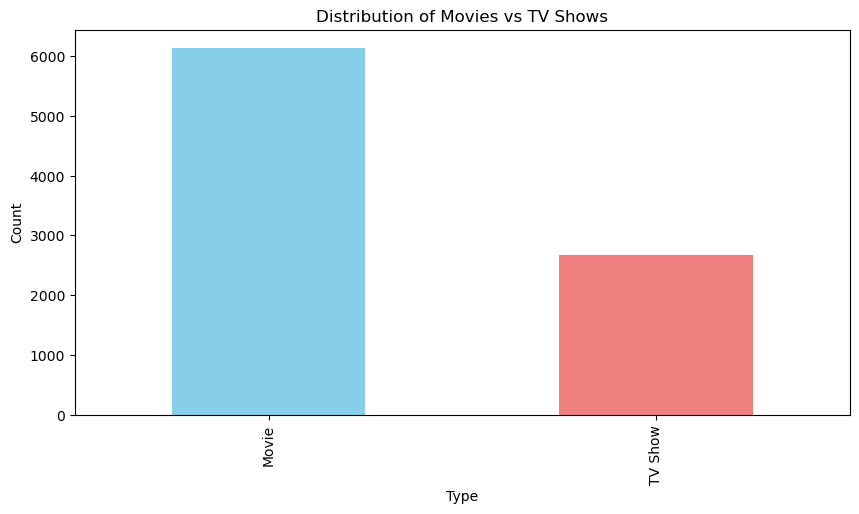

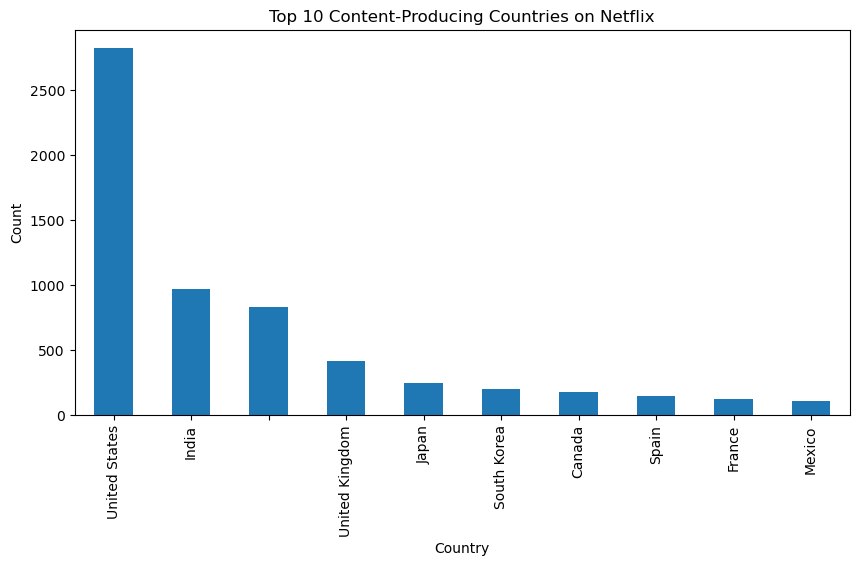

In [6]:
# --- Exploratory Data Analysis ---
plt.figure(figsize=(10,5))
df['type'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribution of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,5))
df['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Content-Producing Countries on Netflix')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [7]:
# --- Feature Extraction (TF-IDF) ---
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['tags'])
print('TF-IDF matrix shape:', tfidf_matrix.shape)

# Compute cosine similarity between items
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

TF-IDF matrix shape: (8807, 5000)


In [8]:
# --- Recommendation Function ---
def recommend(title, cosine_sim=cosine_sim):
    if title not in df['title'].values:
        return f"'{title}' not found in Netflix dataset."
    
    idx = df[df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    recommended_indices = [i[0] for i in sim_scores]
    return df[['title', 'listed_in', 'description']].iloc[recommended_indices]

# Example
('Recommendations for "Breaking Bad":')
recommend('Breaking Bad')

,title,listed_in,description
2931,Better Call Saul,"Crime TV Shows, TV Comedies, TV Dramas","This Emmy-nominated prequel to ""Breaking Bad"" ..."
6996,Hormones,"International TV Shows, Romantic TV Shows, TV ...",High school students in Bangkok wrestle with i...
8505,The Show,Dramas,A disillusioned reality TV host and an idealis...
7984,Servant of the People,"International TV Shows, TV Comedies",After a Ukrainian high school teacher's tirade...
5352,"Have You Ever Fallen in Love, Miss Jiang?","Crime TV Shows, International TV Shows, TV Dramas",A new teacher finds herself in an unenviable s...
8574,ThirTEEN Terrors,"International TV Shows, TV Horror, TV Mysteries",A group of teens searches for the dark truth b...
1067,The Underclass,"International TV Shows, TV Dramas, Teen TV Shows","After getting dropped from an elite program, a..."
7447,Merlí,"International TV Shows, TV Dramas, Teen TV Shows",An unconventional high school philosophy teach...
3855,The Writer,"Crime TV Shows, International TV Shows, TV Dramas",When accused of a murder eerily parallel to a ...
679,The Judgement,"Crime TV Shows, International TV Shows, TV Dramas",After a traumatic incident at a party makes he...


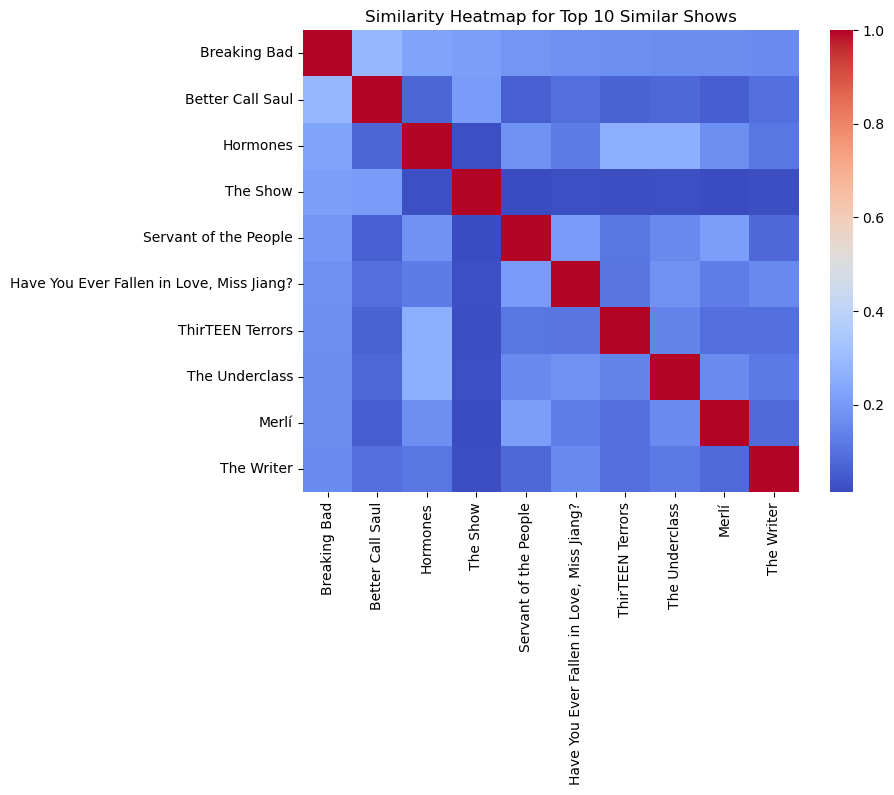

In [10]:
# --- Visualize Similarity Example ---
# Show a heatmap for the top 10 similar titles
import seaborn as sns

example_title = 'Breaking Bad'
if example_title in df['title'].values:
    idx = df[df['title'] == example_title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[:10]
    sim_indices = [i[0] for i in sim_scores]
    sim_titles = df['title'].iloc[sim_indices]
    sim_matrix = cosine_similarity(tfidf_matrix[sim_indices])
    plt.figure(figsize=(8,6))
    sns.heatmap(sim_matrix, xticklabels=sim_titles, yticklabels=sim_titles, cmap='coolwarm')
    plt.title('Similarity Heatmap for Top 10 Similar Shows')
    plt.show()

### ✅ Conclusion
In this project, I built a movie recommendation system using the Netflix dataset.
The system recommends similar movies or TV shows based on their description, cast, director, and genre.
I used **TF-IDF vectorization** to convert text data into numerical form and **cosine similarity** to find how close two titles are in terms of content.

This project helped me understand how NLP can be used for building real-world applications like content recommendation.
I learned about text preprocessing, feature extraction, and similarity measures in machine learning.
In the future, I would like to improve this project by adding collaborative filtering, integrating user ratings, and deploying it as a small web app using Streamlit or Flask